# NASDAQ 100 Trend Classification: Machine Learning's Approach to Identifying Major Turning Points

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
merged_dataframe = pd.read_csv('merged_dataframe.csv', index_col='Date', parse_dates=True)
nasdaq_df = pd.read_csv('nasdaq_data.csv', index_col='Date', parse_dates=True)


In [3]:
print(merged_dataframe.head())

                  GC=F         ^DJT   ^FVX   ^IRX         ^NDX        ^RUT  \
Date                                                                         
2007-01-02  635.200012          NaN    NaN    NaN          NaN         NaN   
2007-01-03  627.099976  4650.660156  4.657  4.915  1759.369995  787.419983   
2007-01-04  623.900024  4673.069824  4.605  4.900  1792.910034  789.950012   
2007-01-05  604.900024  4612.350098  4.644  4.910  1785.300049  775.869995   
2007-01-08  607.500000  4624.180176  4.658  4.910  1787.140015  776.989990   

             ^TNX   ^VIX        ^W5000  Volume_^DJT  ...  PE_Ratio     US GDP  \
Date                                                 ...                        
2007-01-02    NaN    NaN           NaN          NaN  ...     17.36  14215.651   
2007-01-03  4.664  12.04  14246.709961   40270000.0  ...     17.36  14215.651   
2007-01-04  4.618  11.51  14269.900391   32590000.0  ...     17.36  14215.651   
2007-01-05  4.646  12.14  14164.799805   2745000

In [4]:
print(merged_dataframe.shape)

(4180, 22)


In [5]:
print(merged_dataframe.isnull().sum())

GC=F                    3
^DJT                    1
^FVX                    4
^IRX                    4
^NDX                    1
^RUT                    1
^TNX                    4
^VIX                    1
^W5000                  8
Volume_^DJT             1
Volume_^NDX             1
Volume_^RUT             1
PE_Ratio                0
US GDP                  0
CPI                     0
Core Inflation          0
Federal Funds Rate      0
Consumer Sentiment      0
Crude Oil Prices        0
Unemployment Rate       0
Housing Starts          0
Personal Saving Rate    0
dtype: int64


In [6]:
print(nasdaq_df.head())

              Adj Close     Smoothed  Class
Date                                       
2007-01-03  1759.369995  1759.369995      2
2007-01-04  1792.910034  1792.910034      2
2007-01-05  1785.300049  1785.300049      2
2007-01-08  1787.140015  1787.140015      2
2007-01-09  1795.630005  1795.630005      2


In [7]:
print(nasdaq_df.isnull().sum())

Adj Close    0
Smoothed     0
Class        0
dtype: int64


In [8]:
print(nasdaq_df.shape)

(4179, 3)


### Merging the Dataframes

To merge nasdaq_df with merged_dataframe using nasdaq_df dates and keeping only those dates, we use the merge function with a left join:

In [9]:
df = nasdaq_df.merge(merged_dataframe, how='left', left_index=True, right_index=True)


In [10]:
print(df.head())

              Adj Close     Smoothed  Class        GC=F         ^DJT   ^FVX  \
Date                                                                          
2007-01-03  1759.369995  1759.369995      2  627.099976  4650.660156  4.657   
2007-01-04  1792.910034  1792.910034      2  623.900024  4673.069824  4.605   
2007-01-05  1785.300049  1785.300049      2  604.900024  4612.350098  4.644   
2007-01-08  1787.140015  1787.140015      2  607.500000  4624.180176  4.658   
2007-01-09  1795.630005  1795.630005      2  613.099976  4632.660156  4.655   

             ^IRX         ^NDX        ^RUT   ^TNX  ...  PE_Ratio     US GDP  \
Date                                               ...                        
2007-01-03  4.915  1759.369995  787.419983  4.664  ...     17.36  14215.651   
2007-01-04  4.900  1792.910034  789.950012  4.618  ...     17.36  14215.651   
2007-01-05  4.910  1785.300049  775.869995  4.646  ...     17.36  14215.651   
2007-01-08  4.910  1787.140015  776.989990  4.660  

In [11]:
print(df.columns)

Index(['Adj Close', 'Smoothed', 'Class', 'GC=F', '^DJT', '^FVX', '^IRX',
       '^NDX', '^RUT', '^TNX', '^VIX', '^W5000', 'Volume_^DJT', 'Volume_^NDX',
       'Volume_^RUT', 'PE_Ratio', 'US GDP', 'CPI', 'Core Inflation',
       'Federal Funds Rate', 'Consumer Sentiment', 'Crude Oil Prices',
       'Unemployment Rate', 'Housing Starts', 'Personal Saving Rate'],
      dtype='object')


First, lets remove 'Adj Close' and 'Smoothed' and
second lets a new variable we will call Buffet_ind, which takes the Wilshire 5000 index (as a measure of total market cap) and divides it by the US GDP. 

The Buffett Indicator is a simple, yet powerful tool used to gauge the valuation of a country's entire stock market relative to its overall economy.

In [12]:
# Create df_model by dropping 'Adj Close' and 'Smoothed' columns
df_model = df.drop(columns=['Adj Close', 'Smoothed'])

# Create a new variable 'Buffet_ind'
df_model['Buffet_ind'] = df_model['^W5000'] / df_model['US GDP']


In [13]:
print(df_model.head())

            Class        GC=F         ^DJT   ^FVX   ^IRX         ^NDX  \
Date                                                                    
2007-01-03      2  627.099976  4650.660156  4.657  4.915  1759.369995   
2007-01-04      2  623.900024  4673.069824  4.605  4.900  1792.910034   
2007-01-05      2  604.900024  4612.350098  4.644  4.910  1785.300049   
2007-01-08      2  607.500000  4624.180176  4.658  4.910  1787.140015   
2007-01-09      2  613.099976  4632.660156  4.655  4.945  1795.630005   

                  ^RUT   ^TNX   ^VIX        ^W5000  ...     US GDP      CPI  \
Date                                                ...                       
2007-01-03  787.419983  4.664  12.04  14246.709961  ...  14215.651  202.416   
2007-01-04  789.950012  4.618  11.51  14269.900391  ...  14215.651  202.416   
2007-01-05  775.869995  4.646  12.14  14164.799805  ...  14215.651  202.416   
2007-01-08  776.989990  4.660  12.00  14197.150391  ...  14215.651  202.416   
2007-01-09  77

A commonly used method to calculate a simplified yield curve slope is to subtract the yield of a short-term bond from a long-term bond. For instance:

10-Year and 2-Year Slope:This gives you the difference between the 10-year and 2-year yields.

10-Year and 3-Month Slope: This gives you the difference between the 10-year and 3-month yields.

The difference (or spread) is a measure of the yield curve's slope. A positive spread (when the long-term yield is higher than the short-term yield) typically indicates a normal or upward-sloping yield curve. Conversely, a negative spread (when the short-term yield is higher than the long-term yield) can indicate an inverted yield curve, which historically has been seen as a potential indicator of an upcoming recession.

In [14]:
# Calculate the 10Y-2Y Slope
df_model['10Y-2Y Slope'] = df_model['^TNX'] - df_model['^FVX']

# Calculate the 10Y-3M Slope
df_model['10Y-3M Slope'] = df_model['^TNX'] - df_model['^IRX']

print(df_model[['10Y-2Y Slope', '10Y-3M Slope']].head())


            10Y-2Y Slope  10Y-3M Slope
Date                                  
2007-01-03         0.007        -0.251
2007-01-04         0.013        -0.282
2007-01-05         0.002        -0.264
2007-01-08         0.002        -0.250
2007-01-09         0.001        -0.289


In [15]:
print(df_model.head())

            Class        GC=F         ^DJT   ^FVX   ^IRX         ^NDX  \
Date                                                                    
2007-01-03      2  627.099976  4650.660156  4.657  4.915  1759.369995   
2007-01-04      2  623.900024  4673.069824  4.605  4.900  1792.910034   
2007-01-05      2  604.900024  4612.350098  4.644  4.910  1785.300049   
2007-01-08      2  607.500000  4624.180176  4.658  4.910  1787.140015   
2007-01-09      2  613.099976  4632.660156  4.655  4.945  1795.630005   

                  ^RUT   ^TNX   ^VIX        ^W5000  ...  Core Inflation  \
Date                                                ...                   
2007-01-03  787.419983  4.664  12.04  14246.709961  ...           208.6   
2007-01-04  789.950012  4.618  11.51  14269.900391  ...           208.6   
2007-01-05  775.869995  4.646  12.14  14164.799805  ...           208.6   
2007-01-08  776.989990  4.660  12.00  14197.150391  ...           208.6   
2007-01-09  778.330017  4.656  11.91  

In [16]:
df_model.to_csv('df_model.csv')

## Overview

The dataset contains 4,179 entries and 27 columns.

The columns include a 'Date' column, the target variable 'Class', and 25 independent variables.

In [17]:
print(df_model.shape)

(4179, 26)


In [18]:
print(df_model.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4179 entries, 2007-01-03 to 2023-08-09
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 4179 non-null   int64  
 1   GC=F                  4176 non-null   float64
 2   ^DJT                  4179 non-null   float64
 3   ^FVX                  4176 non-null   float64
 4   ^IRX                  4176 non-null   float64
 5   ^NDX                  4179 non-null   float64
 6   ^RUT                  4179 non-null   float64
 7   ^TNX                  4176 non-null   float64
 8   ^VIX                  4179 non-null   float64
 9   ^W5000                4172 non-null   float64
 10  Volume_^DJT           4179 non-null   float64
 11  Volume_^NDX           4179 non-null   float64
 12  Volume_^RUT           4179 non-null   float64
 13  PE_Ratio              4179 non-null   float64
 14  US GDP                4179 non-null   float64
 15  CPI

## Missing Values

The columns Buffet_ind and ^W5000 have the highest number of missing values, but it's still relatively low.

In [19]:
print(df_model.isnull().sum())


Class                   0
GC=F                    3
^DJT                    0
^FVX                    3
^IRX                    3
^NDX                    0
^RUT                    0
^TNX                    3
^VIX                    0
^W5000                  7
Volume_^DJT             0
Volume_^NDX             0
Volume_^RUT             0
PE_Ratio                0
US GDP                  0
CPI                     0
Core Inflation          0
Federal Funds Rate      0
Consumer Sentiment      0
Crude Oil Prices        0
Unemployment Rate       0
Housing Starts          0
Personal Saving Rate    0
Buffet_ind              7
10Y-2Y Slope            3
10Y-3M Slope            3
dtype: int64


We will use the interpolate method with a time-based approach to fill in missing values:

In [20]:
# Interpolate missing values using time-based method
df_interpolated = df_model.interpolate(method='time')

# Check for remaining missing values
missing_values_after_interpolation = df_interpolated.isnull().sum()

missing_values_after_interpolation[missing_values_after_interpolation > 0]

Series([], dtype: int64)

## Distribution

Next, let's proceed to the fourth step: Distribution of the Target Variable (Class). We'll visualize the distribution to understand the balance among its classes.

Class 2 (Neither): This class dominates the dataset with the highest number of instances. It's clear that a significant portion of the data points are classified as neither peaks nor valleys for the NASDAQ 100.

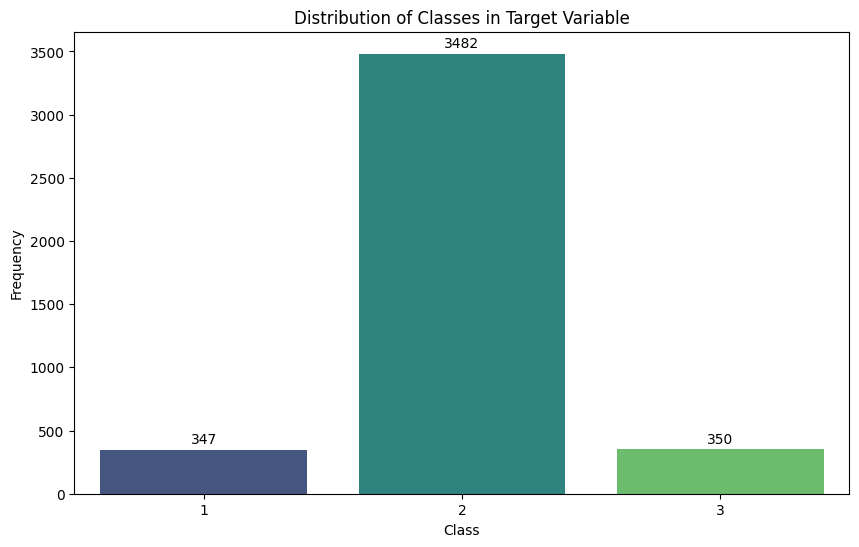

In [21]:
# Distribution of the target variable 'Class' in the updated dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=df_model, x='Class', palette='viridis')
plt.title('Distribution of Classes in Target Variable')
plt.ylabel('Frequency')
plt.xlabel('Class')

# Displaying the actual counts above the bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2., height + 25, 
                   '{:1.0f}'.format(height), ha='center', va='bottom')

plt.show()


Distribution of Independent Variables. As before, for brevity, we'll visualize a subset of the independent variables.

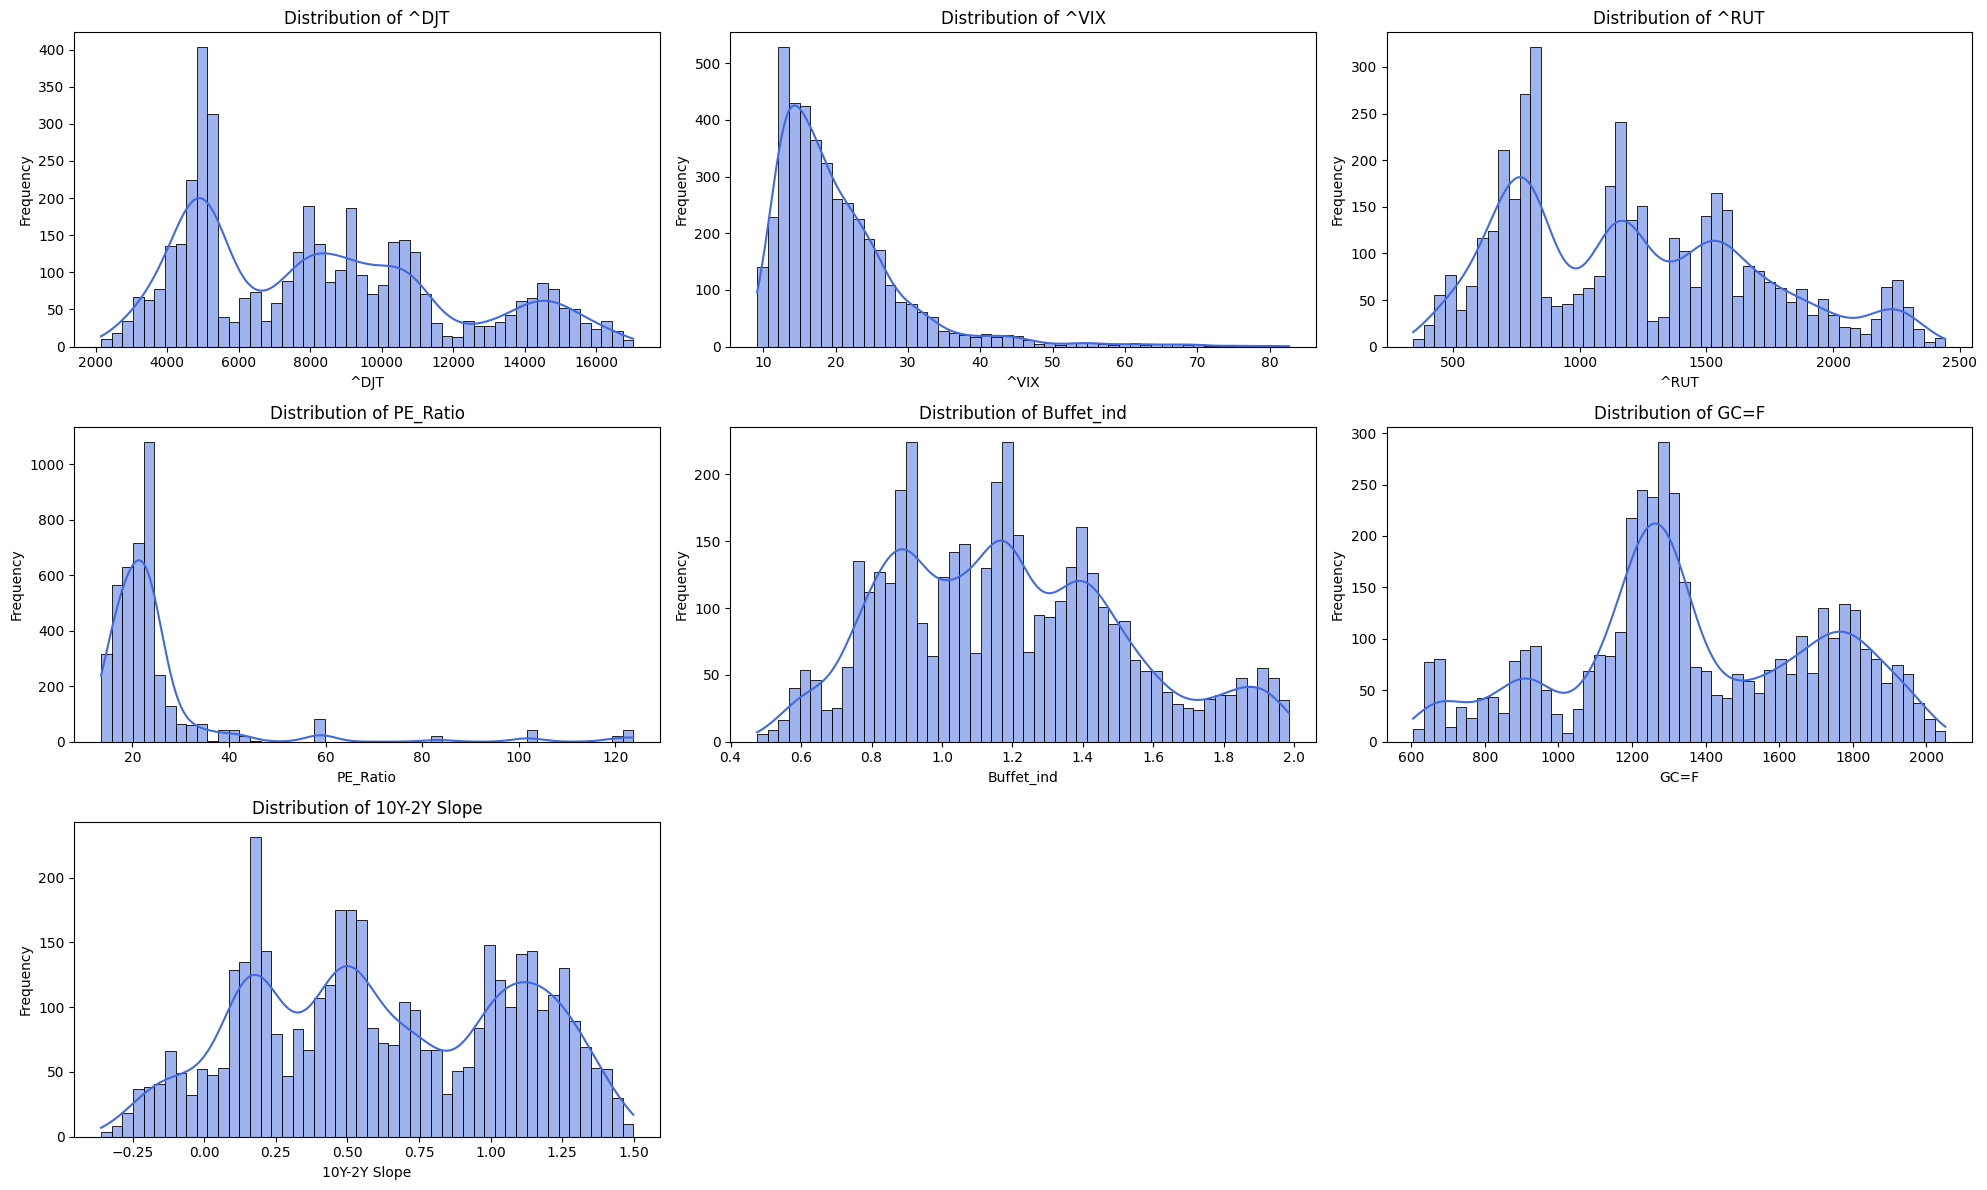

In [22]:
# Selected independent variables for visualization
selected_variables_updated = ['^DJT', '^VIX', '^RUT', 'PE_Ratio', 'Buffet_ind', 'GC=F', '10Y-2Y Slope']

# Plotting the distributions for the selected independent variables
plt.figure(figsize=(20, 12))
for i, col in enumerate(selected_variables_updated, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(df_interpolated[col], bins=50, kde=True, color='royalblue')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Correlation Analysis

In [23]:
# Correlation Analysis
correlation_matrix = df_interpolated.corr()

# Sorting the correlations of independent variables with the target variable 'Class'
correlations_with_target = correlation_matrix['Class'].sort_values(ascending=False)

print(correlations_with_target)


Class                   1.000000
^VIX                    0.083602
Volume_^RUT             0.032319
Personal Saving Rate    0.019525
10Y-2Y Slope            0.006745
10Y-3M Slope            0.001950
Volume_^DJT             0.001750
PE_Ratio               -0.001007
Unemployment Rate      -0.002671
Housing Starts         -0.006188
Federal Funds Rate     -0.006362
US GDP                 -0.006534
Core Inflation         -0.007478
GC=F                   -0.008101
CPI                    -0.010375
Consumer Sentiment     -0.011936
^IRX                   -0.013435
Volume_^NDX            -0.015739
^TNX                   -0.017970
^FVX                   -0.018828
^NDX                   -0.028500
^DJT                   -0.030096
^W5000                 -0.030958
Crude Oil Prices       -0.033891
^RUT                   -0.035662
Buffet_ind             -0.044617
Name: Class, dtype: float64


The correlation of independent variables with the target variable 'Class' shows:

^VIX (CBOE Volatility Index): This variable has the highest positive correlation with the target, indicating that as the Volatility Index increases, the likelihood of observing a peak (Class 1) or valley (Class 3) also increases.

Volume_^RUT: Positive correlation, but weaker than ^VIX.

Buffet_ind (The Buffett Indicator): This variable has the most negative correlation, suggesting that as the Buffett Indicator value decreases, the likelihood of observing a peak or valley increases.

^RUT (Russell 2000 Index) and Crude Oil Prices: These variables also have negative correlations with the target.

However, it's essential to note that all these correlations are relatively low, suggesting that no single variable strongly predicts the class on its own. 

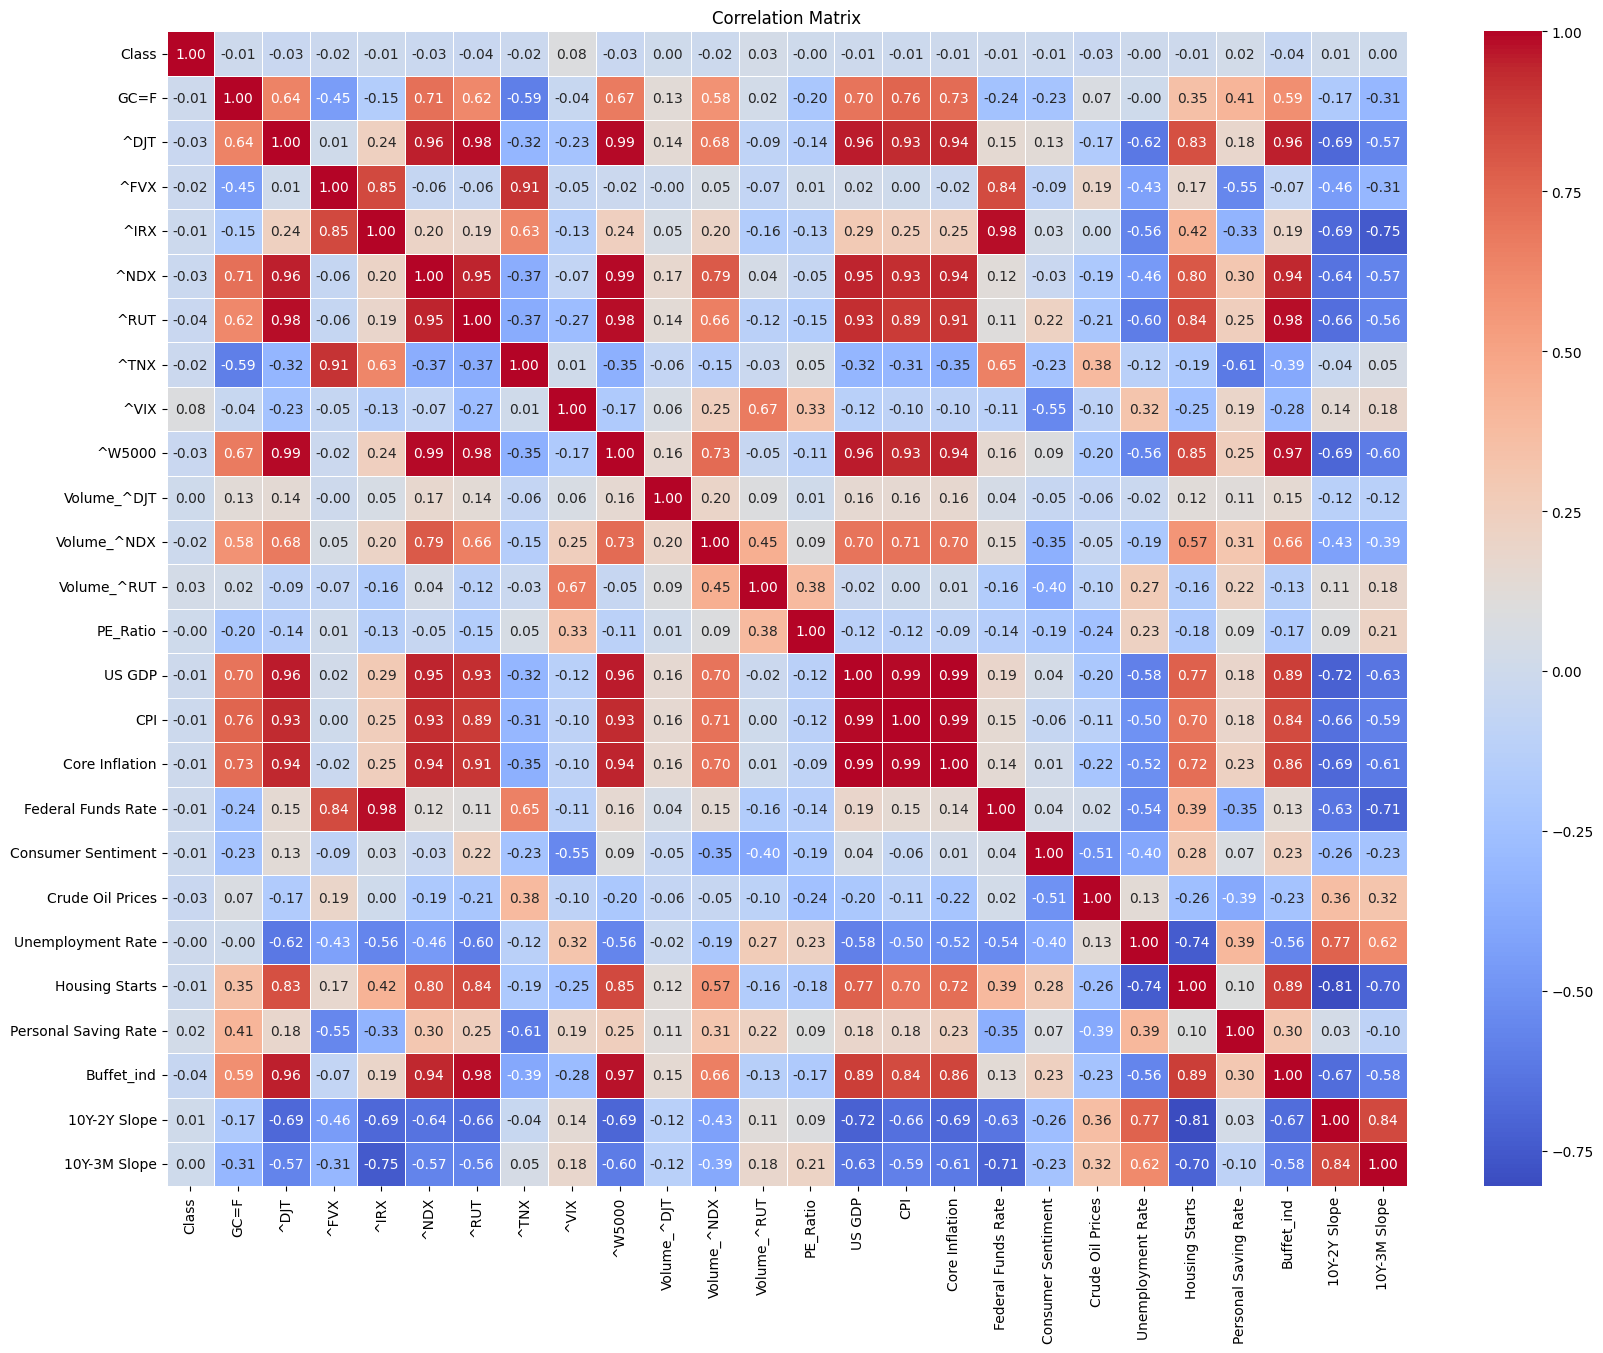

In [24]:
# Plotting the heatmap for correlation
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

There are strong positive correlations between some stock indices, such as between ^DJT and ^W5000, or ^RUT and ^W5000.

The 10Y-2Y Slope and 10Y-3M Slope are highly correlated, as expected since they are derived from similar underlying variables (^TNX, ^FVX, and ^IRX).

The Federal Funds Rate has positive correlations with the treasury note yields (^TNX, ^FVX, and ^IRX).

There is a negative correlation between ^VIX (Volatility Index) and many of the stock indices (^DJT, ^RUT, etc.), indicating that when the market's expected volatility rises, stock indices tend to decrease.

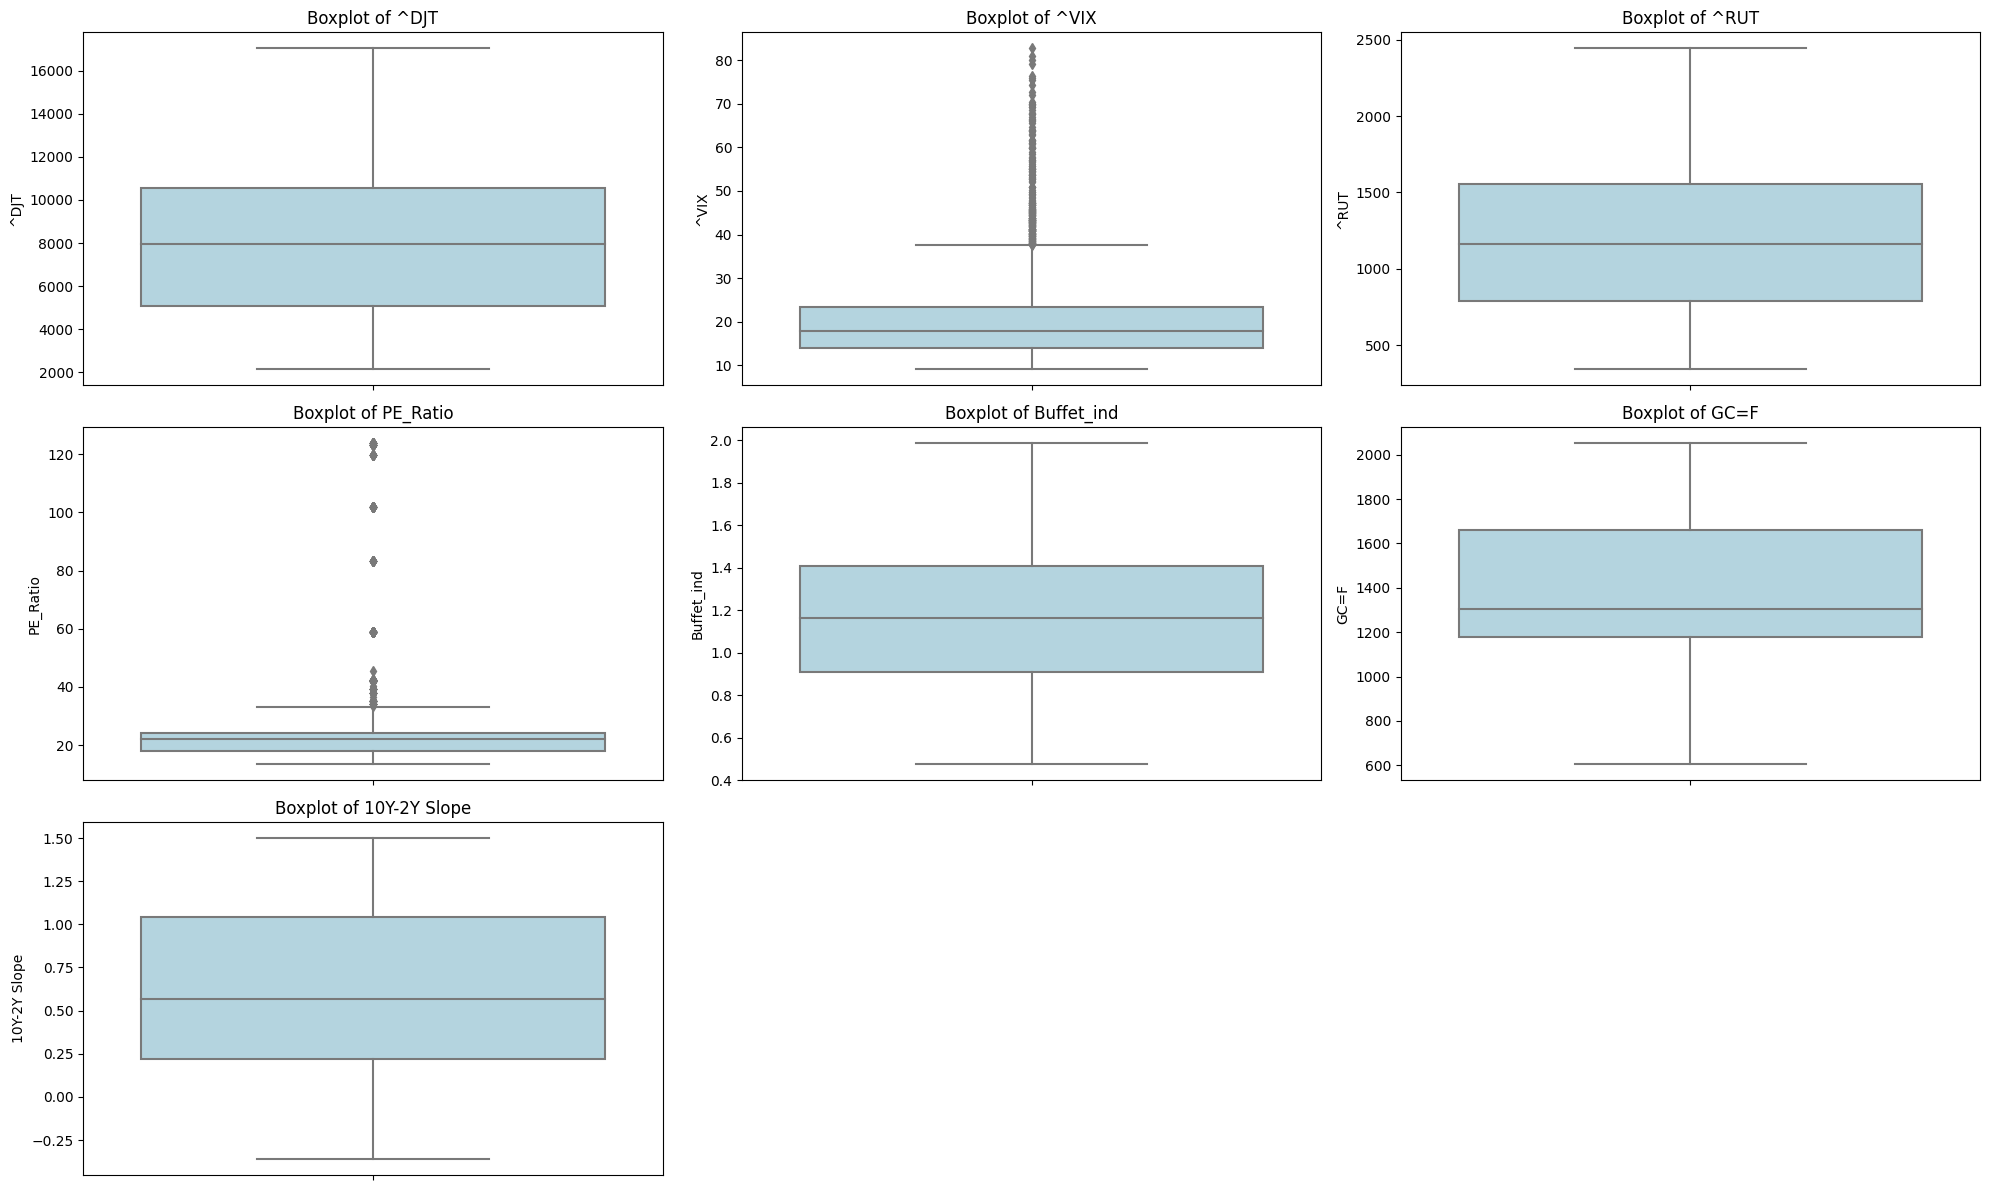

In [25]:
# Plotting boxplots for the selected independent variables to detect outliers in the updated dataset
plt.figure(figsize=(20, 12))
for i, col in enumerate(selected_variables_updated, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_interpolated[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


Save as .ccsv 

In [27]:
df_interpolated.to_csv('df_interpolated.csv')